# Task 1: Introduction

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [51]:
def generate_examples(num=1000):
    W=[1.0, -3.0]
    b= 1.0
    
    W= np.reshape(W, (2, 1))
    X= np.random.randn(num,2)
    y= b + np.dot(X,W)
    y= np.reshape(y, (num,1))
    return X,y

In [52]:
X,y = generate_examples()

In [53]:
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [54]:
print(X[0],y[0])

[0.62790794 0.52057467] [0.06618393]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [55]:
class Model:
    def __init__(self,num_features):
        self.num_features= num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

In [56]:
model = Model(2)
print(model.W)
print(model.b)

[[ 0.45259925]
 [-2.20481804]]
-0.6396474246702172


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [57]:
class Model(Model):
    def forward_pass(self,X):
        y_hat = self.b + np.dot(X,self.W)
        return y_hat

In [58]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape)

(1000, 1)


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [59]:
class Model(Model):
    def compute_loss(self, y_hat, y_true):
        return np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])

In [60]:
model= Model(2)
y_hat= model.forward_pass(X)
loss = model.compute_loss(y_hat, y)

In [61]:
loss

6.278334515868279

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [62]:
class Model(Model):
    def backward_pass(self,X,y_true,y_hat):
        m = y_true.shape[0]
        db = (1/m)*np.sum(y_hat - y_true)
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat - y_true),X),axis=0)
        return dW,db

In [63]:
model= Model(2)
X,y= generate_examples()
y_hat = model.forward_pass(X)

dW, db= model.backward_pass(X,y,y_hat)

In [64]:
print(dW,db)

[-0.07982336  0.47695998] -1.8085198596565426


# Task 7: Update Parameters

In [65]:
class Model(Model):
    def update_params(self, dW,db,lr):
        self.W= self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - db

# Task 8: Training Loop

In [66]:
class Model(Model):
    def train(self,x_train, y_train, iterations,lr):
        losses=[]
        for i in range(0,iterations):
            y_hat= self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW,db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW,db, lr)
            losses.append(loss)
            if i%int(iterations/10):
                print('Iter: {},Loss : {:.4f}'.format(i,loss))
            
        return loss

In [67]:
model = Model(2)

In [68]:
x_train, y_train = generate_examples()

In [69]:
losses= model.train(x_train,y_train,1000, 3e-3)

Iter: 1,Loss : 0.8423
Iter: 2,Loss : 0.8372
Iter: 3,Loss : 0.8322
Iter: 4,Loss : 0.8272
Iter: 5,Loss : 0.8223
Iter: 6,Loss : 0.8174
Iter: 7,Loss : 0.8125
Iter: 8,Loss : 0.8076
Iter: 9,Loss : 0.8028
Iter: 10,Loss : 0.7980
Iter: 11,Loss : 0.7932
Iter: 12,Loss : 0.7885
Iter: 13,Loss : 0.7837
Iter: 14,Loss : 0.7791
Iter: 15,Loss : 0.7744
Iter: 16,Loss : 0.7698
Iter: 17,Loss : 0.7652
Iter: 18,Loss : 0.7606
Iter: 19,Loss : 0.7560
Iter: 20,Loss : 0.7515
Iter: 21,Loss : 0.7470
Iter: 22,Loss : 0.7425
Iter: 23,Loss : 0.7381
Iter: 24,Loss : 0.7337
Iter: 25,Loss : 0.7293
Iter: 26,Loss : 0.7249
Iter: 27,Loss : 0.7206
Iter: 28,Loss : 0.7163
Iter: 29,Loss : 0.7120
Iter: 30,Loss : 0.7077
Iter: 31,Loss : 0.7035
Iter: 32,Loss : 0.6993
Iter: 33,Loss : 0.6951
Iter: 34,Loss : 0.6909
Iter: 35,Loss : 0.6868
Iter: 36,Loss : 0.6827
Iter: 37,Loss : 0.6786
Iter: 38,Loss : 0.6746
Iter: 39,Loss : 0.6705
Iter: 40,Loss : 0.6665
Iter: 41,Loss : 0.6625
Iter: 42,Loss : 0.6586
Iter: 43,Loss : 0.6546
Iter: 44,Loss : 0.65

Iter: 401,Loss : 0.0764
Iter: 402,Loss : 0.0759
Iter: 403,Loss : 0.0755
Iter: 404,Loss : 0.0750
Iter: 405,Loss : 0.0746
Iter: 406,Loss : 0.0741
Iter: 407,Loss : 0.0737
Iter: 408,Loss : 0.0732
Iter: 409,Loss : 0.0728
Iter: 410,Loss : 0.0724
Iter: 411,Loss : 0.0719
Iter: 412,Loss : 0.0715
Iter: 413,Loss : 0.0711
Iter: 414,Loss : 0.0707
Iter: 415,Loss : 0.0702
Iter: 416,Loss : 0.0698
Iter: 417,Loss : 0.0694
Iter: 418,Loss : 0.0690
Iter: 419,Loss : 0.0686
Iter: 420,Loss : 0.0682
Iter: 421,Loss : 0.0678
Iter: 422,Loss : 0.0673
Iter: 423,Loss : 0.0669
Iter: 424,Loss : 0.0665
Iter: 425,Loss : 0.0661
Iter: 426,Loss : 0.0658
Iter: 427,Loss : 0.0654
Iter: 428,Loss : 0.0650
Iter: 429,Loss : 0.0646
Iter: 430,Loss : 0.0642
Iter: 431,Loss : 0.0638
Iter: 432,Loss : 0.0634
Iter: 433,Loss : 0.0630
Iter: 434,Loss : 0.0627
Iter: 435,Loss : 0.0623
Iter: 436,Loss : 0.0619
Iter: 437,Loss : 0.0616
Iter: 438,Loss : 0.0612
Iter: 439,Loss : 0.0608
Iter: 440,Loss : 0.0605
Iter: 441,Loss : 0.0601
Iter: 442,Loss :

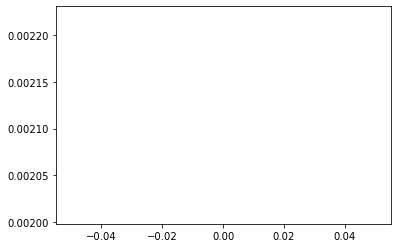

In [70]:
plt.plot(losses);

# Task 9: Predictions

In [71]:
model_untrained= Model(2)
x_test, y_test= generate_examples(500)
print(x_test.shape,y_test.shape)

(500, 2) (500, 1)


In [72]:
preds_untrained= model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

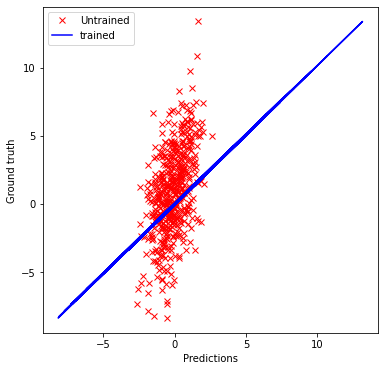

In [73]:
plt.figure(figsize=(6,6))
plt.plot(preds_untrained, y_test, 'rx', label='Untrained')
plt.plot(preds_trained, y_test, 'b', label='trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground truth')
plt.show()